In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

warnings.filterwarnings('ignore')

In [58]:

# Load dataset
df = pd.read_csv("Fertilizer.csv")
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Nitrogen  Potassium  Phosphorous                Fertilizer Name
0        37          0            0                           Urea
1        12          0           36                            DAP
2         7          9           30  Fourteen-Thirty Five-Fourteen
3        22          0           20      Twenty Eight-Twenty Eight
4        35          0            0                           Urea


In [59]:
# Display unique fertilizer names
print("Unique Fertilizer Names:")
print(df['Fertilizer Name'].unique())


Unique Fertilizer Names:
['Urea' 'DAP' 'Fourteen-Thirty Five-Fourteen' 'Twenty Eight-Twenty Eight'
 'Seventeen-Seventeen-Seventeen' 'Twenty-Twenty'
 'Ten-Twenty Six-Twenty Six']


In [60]:
# Dataset Statistics
print("Dataset Statistics:")
print(df.describe())

Dataset Statistics:
        Nitrogen  Potassium  Phosphorous
count  99.000000  99.000000    99.000000
mean   18.909091   3.383838    18.606061
std    11.599693   5.814667    13.476978
min     4.000000   0.000000     0.000000
25%    10.000000   0.000000     9.000000
50%    13.000000   0.000000    19.000000
75%    24.000000   7.500000    30.000000
max    42.000000  19.000000    42.000000


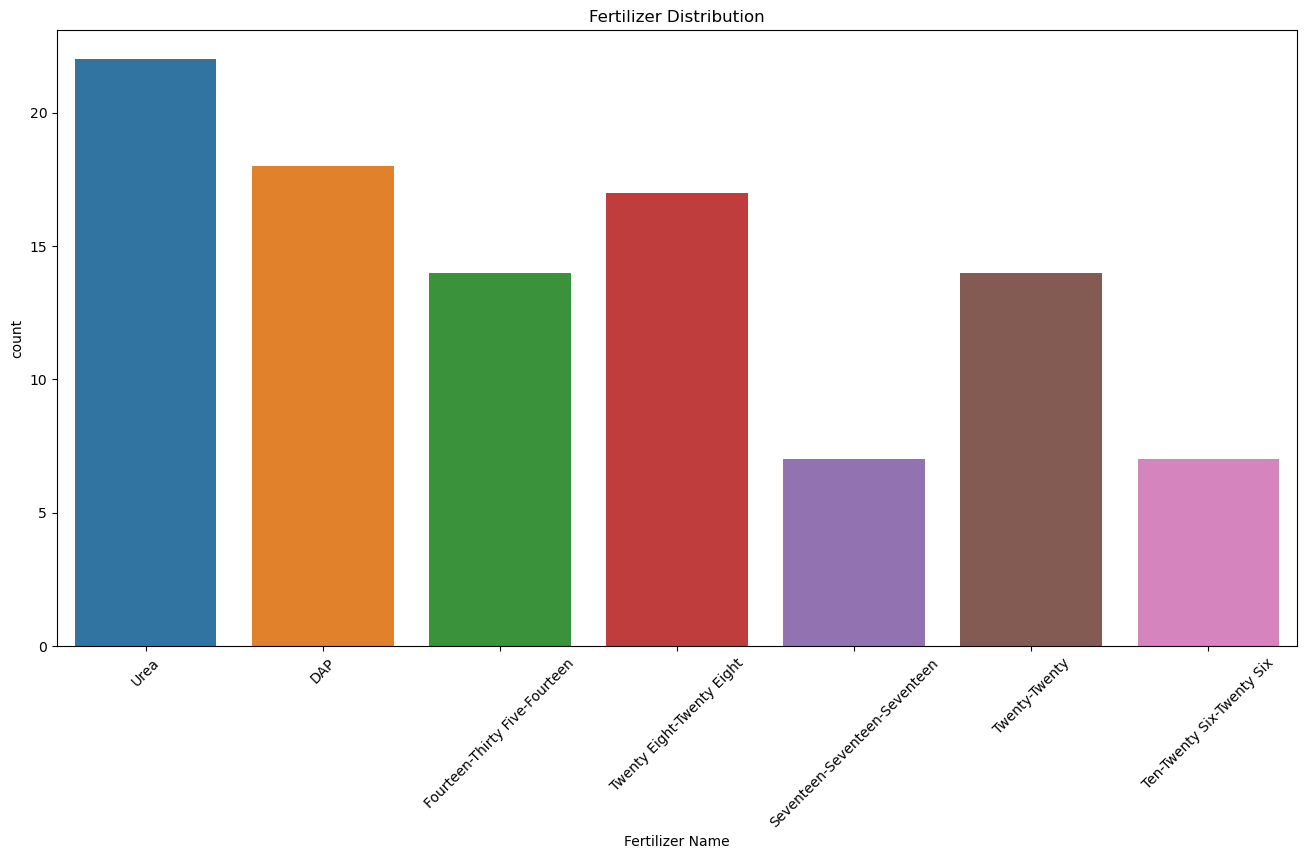

In [61]:
# Visualizing Fertilizer Distribution
plt.figure(figsize=(16, 8))
sns.countplot(x='Fertilizer Name', data=df)
plt.xticks(rotation=45)
plt.title("Fertilizer Distribution")
plt.show()

In [62]:

# Encoding Fertilizer Name
encode_ferti = LabelEncoder()
df['Fertilizer Name'] = encode_ferti.fit_transform(df['Fertilizer Name'])


In [63]:
# Creating a mapping of fertilizer names
fertilizer_mapping = dict(zip(encode_ferti.classes_, encode_ferti.transform(encode_ferti.classes_)))
print("Encoding Mapping:")
print(fertilizer_mapping)

Encoding Mapping:
{'DAP': 0, 'Fourteen-Thirty Five-Fourteen': 1, 'Seventeen-Seventeen-Seventeen': 2, 'Ten-Twenty Six-Twenty Six': 3, 'Twenty Eight-Twenty Eight': 4, 'Twenty-Twenty': 5, 'Urea': 6}


In [64]:
# Splitting Data
X = df.drop(columns=['Fertilizer Name'])
y = df['Fertilizer Name']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=42)


In [65]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
# Train RandomForest model
classifier = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [67]:
# Predictions
y_pred = classifier.predict(X_test)


In [68]:
# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[7 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 6 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 7]]
Accuracy Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [69]:
# Hyperparameter Tuning
params = {
    'n_estimators': [300, 400, 500],
    'max_depth': [5, 6, 7],
    'min_samples_split': [2, 5, 8]
}
grid_rand = GridSearchCV(classifier, params, cv=3, verbose=3, n_jobs=-1)
grid_rand.fit(X_train, y_train)

print("Best score:", grid_rand.best_score_)
print("Best params:", grid_rand.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best score: 0.9855072463768115
Best params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [70]:
# Save the model
with open('classifier1.pkl', 'wb') as pickle_out:
    pickle.dump(grid_rand, pickle_out)

In [71]:
# Load the model for prediction
model = pickle.load(open('classifier1.pkl', 'rb'))


In [76]:
# Sample prediction
sample_input = [[12, 21, 21]]
scaled_input = sc.transform(sample_input)  # Apply same scaling
ans = model.predict(scaled_input)

In [77]:
# Decode the predicted fertilizer name
predicted_fertilizer = encode_ferti.inverse_transform(ans)[0]
print("Predicted Fertilizer:", predicted_fertilizer)

Predicted Fertilizer: Ten-Twenty Six-Twenty Six
